In [67]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from datetime import datetime

Read csv and explore values

In [37]:
df = pd.read_csv('datasets\\blood_pressure.csv')
df.sample(10)

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
2011,65838.0,9/19/1974,NaN,NaN,85.0,NaN,157.0,UNK,46.0,59.0,15.6,NaN,0.8,21.0,18.0,20.0,No,125.0
6360,71364.0,10/19/1994,165.0,75.0,88.0,113.0,252.0,HiGH,NaN,NaN,16.6,1.0,0.8,NaN,NaN,46.0,No,NaN
3592,89829.0,12-09-78,145.0,NaN,NaN,112.0,200.0,UNK,65.0,NaN,13.3,1.0,0.8,34.0,42.0,23.0,Yes,90.0
6275,52895.0,10-10-84,150.0,55.0,NaN,76.0,NaN,LOW,88.0,NaN,13.0,1.0,0.8,NaN,14.0,NaN,No,142.0
6693,NaN,4/24/1994,NaN,NaN,80.0,95.0,161.0,LOW,NaN,NaN,14.9,1.0,0.9,15.0,14.0,27.0,No,120.0
3256,75583.0,8/15/1984,150.0,55.0,88.0,154.0,200.0,HiGH,42.0,116.0,13.1,NaN,0.6,23.0,28.0,NaN,No,124.0
1492,1666.0,11/14/1964,145.0,45.0,NaN,NaN,199.0,NORMAL,NaN,121.0,14.0,1.0,0.7,31.0,28.0,17.0,No,133.0
3661,54064.0,03-10-69,155.0,55.0,66.0,93.0,240.0,LOW,NaN,148.0,NaN,1.0,0.6,21.0,NaN,13.0,Yes,105.0
8449,73257.0,8/15/1964,NaN,NaN,NaN,90.0,208.0,NORMAL,NaN,120.0,14.8,NaN,0.8,NaN,16.0,25.0,No,150.0
3334,143024.0,NaN,NaN,55.0,80.0,NaN,188.0,HiGH,56.0,99.0,14.8,1.0,0.7,41.0,NaN,44.0,No,118.0


In [38]:
df['age'] = datetime.now().year - pd.to_datetime(df['age']).dt.year

C:\Users\DG\AppData\Local\Temp\ipykernel_18180\2897366804.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['age'] = datetime.now().year - pd.to_datetime(df['age']).dt.year


Impute missing values

In [39]:
def impute_values_mean(data:pd.DataFrame, columns:list):
    data_copy = data.copy()
    imputer = SimpleImputer(strategy='mean')

    for column in columns:
        data_copy[column] = imputer.fit_transform(data_copy[[column]])

    return data_copy


In [40]:
def impute_values_median(data:pd.DataFrame, columns:list):
    data_copy = data.copy()
    imputer = SimpleImputer(strategy='mean')

    for column in columns:
        data_copy[column] = imputer.fit_transform(data_copy[[column]])

    return data_copy

In [41]:
for column in df.columns:
    print(type(df[column].to_list()[0]))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>


In [42]:
skew = df.drop(columns=['dental caries','Urine protein','triglyceride']).skew()

In [43]:
skew

id                  -0.012473
age                 -1.568938
height(cm)          -0.062286
weight(kg)           0.472644
relaxation           0.165343
blood sugar          3.383120
Cholesterol          0.069961
HDL                  0.646928
LDL                 15.946590
hemoglobin          -0.501679
serum creatinine     0.687504
AST                  2.283305
ALT                  2.849179
Gtp                  5.058541
blood pressure       0.211946
dtype: float64

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height(cm)'}>,
        <Axes: title={'center': 'weight(kg)'}>],
       [<Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'blood sugar'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'HDL'}>],
       [<Axes: title={'center': 'LDL'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'Urine protein'}>,
        <Axes: title={'center': 'serum creatinine'}>],
       [<Axes: title={'center': 'AST'}>, <Axes: title={'center': 'ALT'}>,
        <Axes: title={'center': 'Gtp'}>,
        <Axes: title={'center': 'blood pressure'}>]], dtype=object)

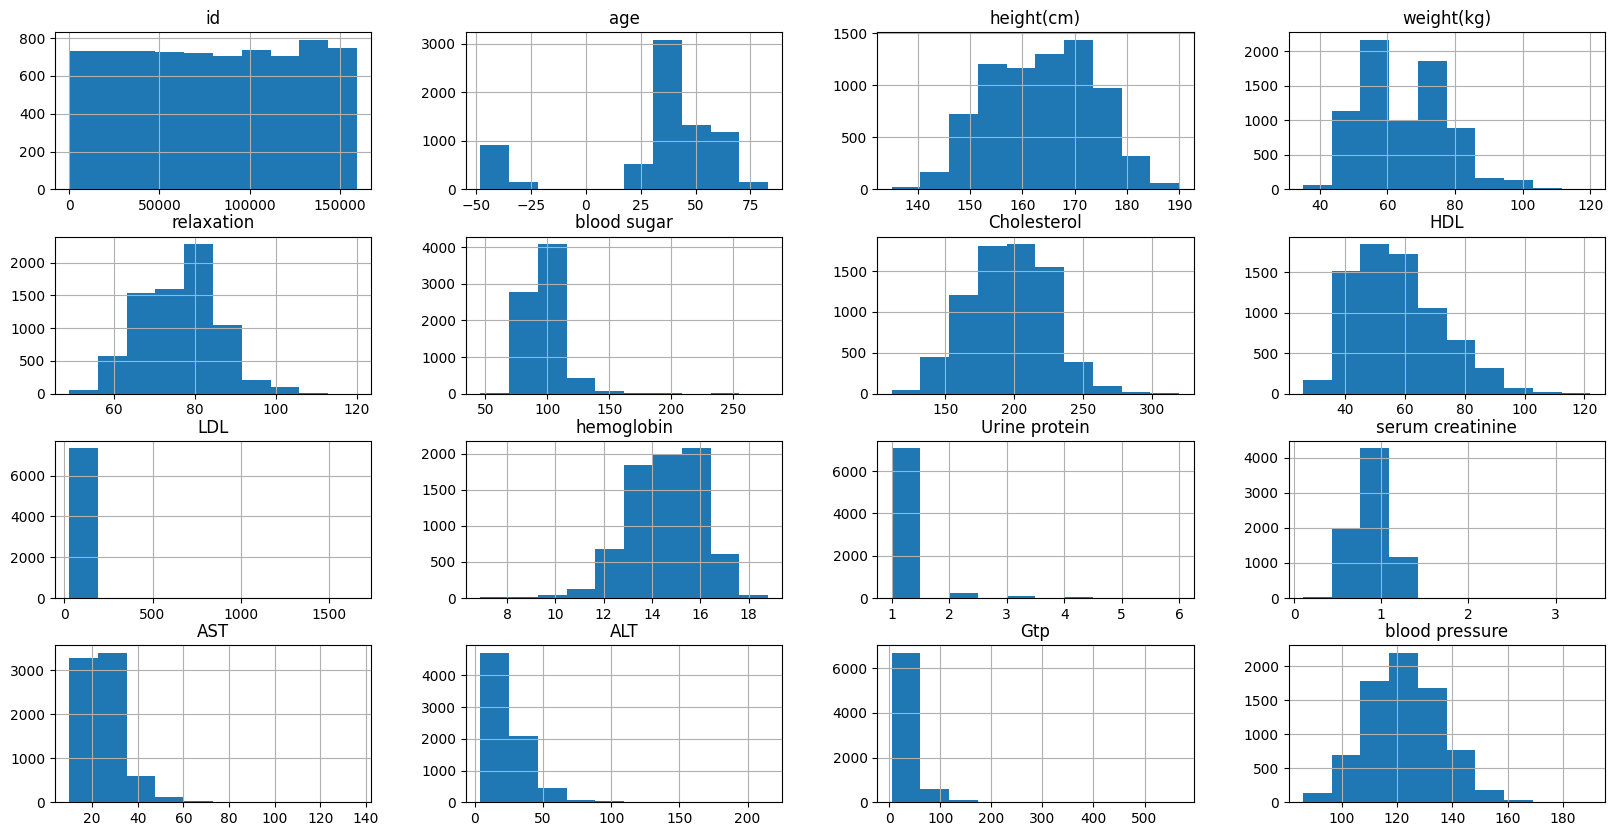

In [44]:
df.hist(figsize=(20,10))

In [51]:
mean_impute = ['height(cm)','weight(kg)','relaxation','Cholesterol','hemoglobin']
median_impute = ['age','blood sugar','HDL', 'LDL','serum creatinine','AST','ALT','Gtp']

df.dropna(subset=['blood pressure'],inplace=True)

In [46]:
df.isnull().sum()

id                  1952
age                 1982
height(cm)          1967
weight(kg)          1927
relaxation          1910
blood sugar         1947
Cholesterol         1966
triglyceride        1007
HDL                 1962
LDL                 1966
hemoglobin          1961
Urine protein       1901
serum creatinine    1921
AST                 1923
ALT                 1919
Gtp                 1927
dental caries          0
blood pressure         0
dtype: int64

In [49]:
df.drop(columns=['id'],axis=1,inplace=True)

In [52]:
df = impute_values_mean(df,mean_impute)
df = impute_values_median(df,median_impute)

In [53]:
df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
relaxation             0
blood sugar            0
Cholesterol            0
triglyceride        1007
HDL                    0
LDL                    0
hemoglobin             0
Urine protein       1901
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
blood pressure         0
dtype: int64

In [54]:
def encode_labels(data:pd.DataFrame, columns:list):
    data_copy = data.copy()
    encoder = LabelEncoder()

    for column in columns:
        data_copy[column] = encoder.fit_transform(data_copy[column])
    
    return data_copy

In [55]:
categorical_features = ['triglyceride','dental caries']
df = encode_labels(df, categorical_features)

In [56]:
def impute_knn(data:pd.DataFrame, columns:list):
    data_copy = data.copy()
    imputer = KNNImputer(n_neighbors=3)

    for column in columns:
        data_copy[column] = imputer.fit_transform(data_copy[[column]])
    
    return data_copy

In [57]:
list_to_be_imputed = ['Urine protein','dental caries']
df = impute_knn(df,list_to_be_imputed)

Split the pandas into test and train, initialize models and find the best one

In [58]:
X = df.drop(['blood pressure'],axis = 1)
Y = df['blood pressure']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [59]:
#Линеарен модел
lr_model = LinearRegression()

#Ridge и KernelRidge модели
ridge_model = Ridge(alpha=0.2)
kernel_ridge_model = KernelRidge()

#DecisionTreeRegressor модел
#max_depth, min_samples_leaf, min_samples_split, max_leaf_nodes
decision_tree=DecisionTreeRegressor()

In [60]:
decision_tree.get_params()

param_grid={
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,6,9],
    'min_samples_split': [1,5,7]
}

grid_search = GridSearchCV(estimator=decision_tree,param_grid=param_grid,cv=5)

In [61]:
grid_search.fit(X_train,y_train)

c:\Users\DG\miniconda3\envs\tfenv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DG\miniconda3\envs\tfenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DG\miniconda3\envs\tfenv\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\DG\miniconda3\envs\tfenv\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "c:\Use

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [3, 6, ...], 'min_samples_split': [1, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [62]:
best_dtr = grid_search.best_estimator_

In [63]:
def evaluate_models(models, X_train, X_test,y_train,y_test, poly_X_test=None, poly_X_train=None):
    results = {}

    for name, model in models.items():
             
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            'R2' : r2,
            'MAE' : mae,
            'MSE': mse
        }
    return results

In [64]:
models = {
    'Linear Regression': lr_model,
    'Ridge Model': ridge_model,
    'Kernel Ridge Model': kernel_ridge_model,
    "Decision Tree Regression model": best_dtr
}

metrics = evaluate_models(models, X_train, X_test,y_train,y_test)

In [65]:
for model_name, metric in metrics.items():
    print(f"model: {model_name}")
    for metric_name, value in metric.items():
        print(f"{metric_name}: {value}")
    print("\n")

model: Linear Regression
R2: 0.46283303840396295
MAE: 7.470173486923927
MSE: 93.15387705734459


model: Ridge Model
R2: 0.4628336269283795
MAE: 7.4701689339090205
MSE: 93.15377499721232


model: Kernel Ridge Model
R2: 0.4559912566055785
MAE: 7.5026304902534084
MSE: 94.34035825605088


model: Decision Tree Regression model
R2: 0.4336007644599049
MAE: 7.636410980501252
MSE: 98.22324998564325




In [66]:
def best_model(metrics):
    best_r2 = -float('inf')
    best_model_name = None

    for model_name,metric in metrics.items():
        r2_score = metric['R2']

        if r2_score > best_r2:
            best_r2=r2_score
            best_model_name = model_name
    print(f"Best Model: {best_model_name}")
    print(f"R2: {best_r2}")
    best_model_metrics = metrics[best_model_name]
    print(f"MAE: {best_model_metrics['MAE']}")
    print(f"MSE {best_model_metrics['MSE']}")

best_model(metrics)

Best Model: Ridge Model
R2: 0.4628336269283795
MAE: 7.4701689339090205
MSE 93.15377499721232
